In [1]:
import pandas as pd
import numpy as np
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import requests
from io import BytesIO
from PIL import Image
import time
import pickle
import streamlit as st
import requests
import cv2
import time
from io import BytesIO
from urllib import request
import urllib
from tkinter import *
import tkinter as tk
import os
import csv

In [2]:
# 체크박스 창 생성
window = Tk()
window.title("Movie Selection")

# 안내문 작성
info = tk.Label (window, text="선호하는 영화 5개를 선택해주세요",
                     bg='grey19', fg = 'snow', width=30, height=2)
info.place(x=110, y=10)

# 체크박스 버튼 생성
movie_list = ['미니언즈','인턴', '맨인블랙',
              '미녀와 야수','포레스트 검프',
             '아바타','해리포터와 마법사의 돌','닥터 스트레인지',
             '인터스텔라','트랜스포머',
             '존윅','어벤저스','다크나이트',
             '에일리언:커버넌트','47미터',
             '메이즈러너','겟 아웃','분노의 질주',
             '쇼생크 탈출','인생은 아름다워']

movie_list_movieid = [211672,257211,607,
                     321612,13,
                     19995,671,284052,
                     157336,1858,
                     245891,24428,155,
                     126889,403119,
                     198663,419430,33739,
                     278,637]

for i in range(1,21):
    globals()['CheckVar{}'.format(i)]=IntVar()
    globals()['c{}'.format(i)] = Checkbutton(window,text="{}".format(movie_list[i-1]),
                                             variable=globals()['CheckVar{}'.format(i)],
                                             command=globals()['CheckVar{}'.format(i)].get(),
                                             onvalue='{}'.format(movie_list_movieid[i-1]))

# 체크박스 버튼 위치 지정
for i in range(1,11):
    globals()['c{}'.format(i)].place(x=80,y=50+20*i)
for i in range(11,21):
    globals()['c{}'.format(i)].place(x=300,y=50+20*(i-10))

# 이전 저장된 체크 데이터 텍스트 파일 경로
t_path = './status.txt'

# 이전 저장된 텍스트 파일 내용 확인
stat_list = []
with open(t_path) as f:
    for line in f:
        stat_list.append(int(line))
print ('stat is %s'%stat_list)

# 한번 체크한 데이터는 다시 제거할때까지 체크 상태로 고정
for i in range(1,21):
    if stat_list[i-1]=='{}'.format(movie_list_movieid[i-1]):
        globals()['c{}'.format(i)].toggle()
    else:
        pass

# 체크한 데이터 텍스트 파일로 저장 함수
def save_status(event):
    file = open(t_path,'w')
    for i in range(1,21):
        file.write('%s\n'%globals()['CheckVar{}'.format(i)].get())
    file.close()
    print ('save complete!')
    window.destroy()

# 선택한 체크박스를 저장시키는 버튼 생성
save_btn = tk.Label (window, text="선택 완료",bg='grey19', fg = 'snow', width=10, height=2)
save_btn.bind('<Button-1>', save_status)
save_btn.place(x=220,y=400)

# 체크박스 창 열기 및 선택
window.geometry('500x500+220+200')
window.mainloop()

# 체크한 데이터 텍스트 파일로 저장
with open(t_path,'r') as file:
    lines = file.readlines()
    data = []
    for line in lines:
        line = line.rstrip('\n')
        data.append(line)
    movieId = data
	
# 신규 유저 수정 전
import pandas as pd

rating = pd.read_csv('./data/ratings.csv')
rating.tail()

def get_now():
    import time
    now = time.time()
    return now
nowunix = round(get_now(),0)

with open('./data/ratings.csv','r',newline='') as app_new:
    UID = app_new.readlines()
    userId = int(float(UID[-1].split(sep=',')[0])) + 1
with open('./data/ratings.csv','a',newline='') as app_new:
    rating = csv.writer(app_new)
    for id in movieId:
        id = int(id)
        if id != 0:
            rating.writerow([userId, id, 4.0, nowunix])
        else : pass

# 신규 유저 수정 후
import pandas as pd

rating = pd.read_csv('./data/ratings.csv')
rating.tail()

stat is [0, 0, 0, 0, 0, 19995, 671, 284052, 157336, 1858, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
save complete!


,userId,movieId,rating,timestamp
100030,677,607,4.0,1.648618e+09
100031,677,284052,4.0,1.648618e+09
100032,677,403119,4.0,1.648618e+09
100033,677,198663,4.0,1.648618e+09
100034,677,33739,4.0,1.648618e+09


In [3]:
ratings = pd.read_csv('./data/ratings.csv')
movies = pd.read_csv('./data/movies.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
movies = movies[['id', 'original_title', 'genres', 'release_date', 'popularity']]
movies = movies.rename(columns={'id':'movieId'})

In [5]:
movies

,movieId,original_title,genres,release_date,popularity
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,21.946943
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,17.015539
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,11.7129
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,3.859495
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,8.387519
...,...,...,...,...,...
45461,439050,رگ خواب,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",NaN,0.072051
45462,111109,Siglo ng Pagluluwal,"[{'id': 18, 'name': 'Drama'}]",2011-11-17,0.178241
45463,67758,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",2003-08-01,0.903007
45464,227506,Satana likuyushchiy,[],1917-10-21,0.003503


In [6]:
movies = movies.loc[movies['popularity'] != 'Beware Of Frost Bites']

In [7]:
movies['popularity'] = movies['popularity']*1000

C:\Users\Admin\AppData\Local\Temp/ipykernel_15304/3027007150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['popularity'] = movies['popularity']*1000


In [8]:
movies['popularity'].astype('int64', errors='ignore')

0                                                21946.943
1                                                17015.539
2                                                  11712.9
3                                                 3859.495
4                                                 8387.519
                               ...                        
45461    0.0720510.0720510.0720510.0720510.0720510.0720...
45462    0.1782410.1782410.1782410.1782410.1782410.1782...
45463    0.9030070.9030070.9030070.9030070.9030070.9030...
45464    0.0035030.0035030.0035030.0035030.0035030.0035...
45465    0.1630150.1630150.1630150.1630150.1630150.1630...
Name: popularity, Length: 45465, dtype: object

In [9]:
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')

C:\Users\Admin\AppData\Local\Temp/ipykernel_15304/1678810987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')


In [10]:
movies['popularity'] = movies['popularity'].dropna(axis = 0)

C:\Users\Admin\AppData\Local\Temp/ipykernel_15304/1977160213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['popularity'] = movies['popularity'].dropna(axis = 0)


In [11]:
movies = movies.loc[movies['popularity'] > 15000].sort_values(['popularity'], ascending = False)

In [12]:
movies.reset_index(drop=True, inplace = True)

In [13]:
ratings = ratings[['userId', 'movieId', 'rating']]

In [14]:
movies.movieId = pd.to_numeric(movies.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce')

In [15]:
def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'', '"'))
    
    genres_list = []
    for g in genres:
        genres_list.append(g['name'])

    return genres_list

In [16]:
def fetch_poster(movie_id): 
    url = 'https://api.themoviedb.org/3/movie/{}?api_key=998ed7e9607d5b520d853548696e8ae2'.format(movie_id)
    data = requests.get(url)
    data = data.json()
    poster_path = data['poster_path']
    full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
    return full_path

In [17]:
from PIL import Image # import하지 않으면 urlopen_img = Image.open(BytesIO(res)) 오류 발생
def final_show(movie_id):
    for i in movie_id:
        try:
            url = fetch_poster(i)
            req = urllib.request.Request(url, headers = {"User-Agent" : "Mozilla/5.0"})
            res = request.urlopen(req).read()
            urlopen_img = Image.open(BytesIO(res))
            plt.imshow(urlopen_img) ## 이미지 출력
            plt.axis('off') ## 축 제거
            plt.show()
            print(movies.loc[movies['movieId'] == i,:]['original_title'].values[0])
            print('=======================')
        except Exception:
            image_path = './Images/none_image.jpg'
            image = img.imread(image_path) ## RGB 값
            plt.imshow(image) ## 이미지 출력
            plt.axis('off') ## 축 제거
            plt.show()
            print(movies.loc[movies['movieId'] == i,:]['original_title'].values[0])
            print('=======================')

In [18]:
movies['genres'] = movies['genres'].apply(parse_genres)

In [19]:
data = pd.merge(ratings, movies, on='movieId', how='inner')

In [20]:
data['popularity'] = data['popularity'].astype('float64')

In [21]:
data = data.sort_values(['popularity'], ascending = False)

In [22]:
matrix = data.pivot_table(index='userId', columns='original_title', values='rating')

In [23]:
matrix.fillna(0, inplace=True)

In [24]:
# 기존유저

GENRE_WEIGHT = 0.1

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

def recommend(userId, matrix, n, similar_genre=True):
    input_genres = movies[movies['original_title'] == data.loc[data['userId']==1]['original_title'].tolist()[0]]['genres'].iloc(0)[0]

    result = []
    for title in matrix.columns:
        if title == data.loc[data['userId']==userId]['original_title'].tolist()[0]:
            continue

        # rating comparison
        cor = pearsonR(matrix[data.loc[data['userId']==userId]['original_title'].tolist()[0]], matrix[title])
        
        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = movies[movies['original_title'] == title]['genres'].iloc(0)[0]
            
            rating = data.loc[data['original_title'] == title]['rating'].values
            rating_result = np.mean(rating)
            
            movieid = movies.loc[movies['original_title'] == title]['movieId'].values
            
            popularity = movies.loc[movies['original_title'] == title]['popularity'].values
            
            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)
            
        if np.isnan(cor):
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), temp_genres, rating_result, movieid, popularity))
            
    result.sort(key=lambda r: r[1], reverse=True)

    return result[:n]

In [25]:
# 기존유저 결과값 출력

recommend_existing_result = recommend(674, matrix, 5, similar_genre=True)

pd.DataFrame(recommend_existing_result, columns = ['Title', 'Correlation', 'Genre', 'rating', 'movie_id', 'popularity'])

,Title,Correlation,Genre,rating,movie_id,popularity
0,Men in Black,0.76,"[Action, Adventure, Comedy, Science Fiction]",4.000000,[607],[15781.024000000001]
1,The Intern,0.68,[Comedy],4.000000,[257211],[15651.705]
2,The Avengers,0.58,"[Science Fiction, Action, Adventure]",4.000000,[24428],[89887.648]
3,Forrest Gump,0.38,"[Comedy, Drama, Romance]",3.944444,[13],[48307.194]
4,Interstellar,0.33,"[Adventure, Drama, Science Fiction]",4.000000,[157336],[32213.481]


In [26]:
recommend_existing_result2 = []

for i in range(5):
    recommend_existing_result2.append(int(recommend_existing_result[i][4][0]))

In [27]:
recommend_existing_result2

[607, 257211, 24428, 13, 157336]

In [28]:
#MBTI 선호장르 딕셔너리로 선언

MBTI = {'INTP':['Fantasy','Science Fiction','Thriller'],'INFP':['Horror','Romance','Drama'],
       'ISFP':['Comedy','Romance','Drama'],'ISTP':['Action','Thriller','Horror'],
       'ENFP':['Horror','Romance','Comedy'],'ENTP':['Action','Thriller','Drama'],
       'ESTP':['Action','Science Fiction','Thriller'],'ENFJ':['Comedy','Romance','Drama'],
       'ENTJ':['Thriller','Action','Horror'],'ESFJ':['Romance','Science Fiction','Fantasy'],
       'ESTJ':['Thriller','Action','Drama'],'INFJ':['Romance','Drama','Comedy'],
       'INTJ':['Science Fiction','Fantasy','Action'],'ISFJ':['Fantasy','Comedy','Romance'],
       'ISTJ':['Fantasy','Science Fiction','Action'],'ESFP':['Horror','Romance','Comedy']}

In [29]:
#신규유저

def recommend_new_mbti(mbti, userId, matrix, n):
    
    Priority = [0,1,2]
    
    choiceList = random.choice(Priority)
    
    MBTI1 = MBTI[mbti][choiceList]
    
    result = []
    
    for i in range(len(movies)):
        if MBTI1 in movies['genres'][i]:
            result.append(i)
            
    return result[:n]

In [30]:
movies

,movieId,original_title,genres,release_date,popularity
0,211672,Minions,"[Family, Animation, Adventure, Comedy]",2015-06-17,547488.298
1,177572,Big Hero 6,"[Adventure, Family, Animation, Action, Comedy]",2014-10-24,213849.907
2,293660,Deadpool,"[Action, Adventure, Comedy]",2016-02-09,187860.492
3,283995,Guardians of the Galaxy Vol. 2,"[Action, Adventure, Comedy, Science Fiction]",2017-04-19,185330.992
4,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,185070.892
...,...,...,...,...,...
557,888,The Flintstones,"[Fantasy, Comedy, Family]",1994-05-26,15019.586
558,346,七人の侍,"[Action, Drama]",1954-04-26,15017.770
559,74725,Kill List,"[Horror, Thriller, Crime]",2011-09-02,15014.569
560,187,Sin City,"[Action, Thriller, Crime]",2005-04-01,15010.525


In [31]:
movies.iloc[recommend_new_mbti('ENTP', 674, matrix, 10),:]

,movieId,original_title,genres,release_date,popularity
6,210577,Gone Girl,"[Mystery, Thriller, Drama]",2014-10-01,154801.009
11,155,The Dark Knight,"[Drama, Action, Crime, Thriller]",2008-07-16,123167.259
12,78,Blade Runner,"[Science Fiction, Drama, Thriller]",1982-06-25,96272.374
15,119450,Dawn of the Planet of the Apes,"[Science Fiction, Action, Drama, Thriller]",2014-06-26,75385.211
16,244786,Whiplash,[Drama],2014-10-10,64299.990
17,550,Fight Club,[Drama],1999-10-15,63869.599
20,278,The Shawshank Redemption,"[Drama, Crime]",1994-09-23,51645.403
21,13,Forrest Gump,"[Comedy, Drama, Romance]",1994-07-06,48307.194
27,424,Schindler's List,"[Drama, History, War]",1993-11-29,41725.123
28,61791,Rise of the Planet of the Apes,"[Thriller, Action, Drama, Science Fiction]",2011-08-03,41613.762


In [32]:
recommend_new_mbti('ENTP', 674, matrix, 10)

[1, 2, 3, 4, 5, 8, 10, 11, 13, 14]

In [33]:
recommend_new_result2 = movies.iloc[recommend_new_mbti('ENTP', 674, matrix, 5),:]['movieId'].astype('int64').tolist()

In [34]:
recommend_existing_result2 = recommend_existing_result2 + recommend_new_result2

In [35]:
recommend_existing_result2

[607, 257211, 24428, 13, 157336, 245891, 210577, 131631, 680, 155]

In [36]:
recommend_new_result2

[245891, 210577, 131631, 680, 155]

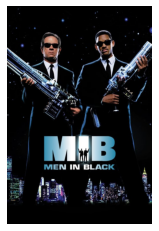

Men in Black


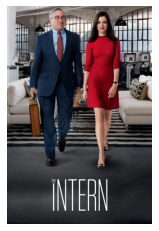

The Intern


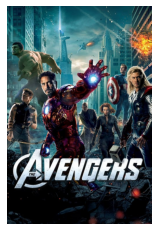

The Avengers


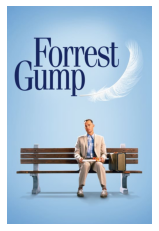

Forrest Gump


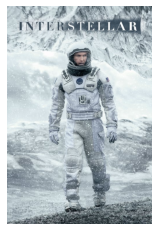

Interstellar


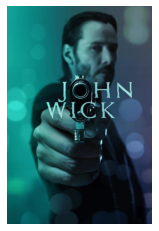

John Wick


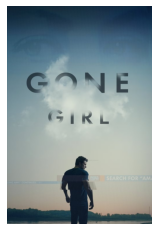

Gone Girl


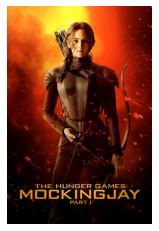

The Hunger Games: Mockingjay - Part 1


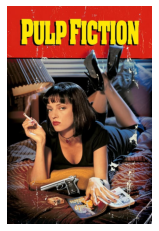

Pulp Fiction


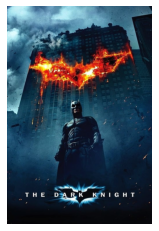

The Dark Knight


In [37]:
final_show(recommend_existing_result2)